This notebook produces the confusion matrix for a data and country you have specified in config.yaml.

In [1]:
from pathlib import Path
import pandas as pd

# from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from common import get_comparison, load_results, get_config

In [2]:
def get_label(x, type="binary"):
    if type == "binary":
        if x == 0:
            label = "no"
        else:
            label = "yes"
    else:
        if x >= 30:
            label = "high"
        elif x >= 15:
            label = "moderate"
        elif x > 0:
            label = "low"
        else:
            label = "zero"
    return label

In [3]:
def get_predictions_and_results():
    predictions = load_results()
    # Gold data
    ground_truth = pd.read_csv(Path("label_CSVs") / "training_complete.csv")

    df = get_comparison(predictions, ground_truth, "inner")
    df["plotID"] = df["plotID"].astype(int)
    df["pl_plotid"] = df["pl_plotid"].astype(int)
    
    return df

def get_confusion_matrix(original_df, cf_type="binary"):
    # Prepare data for the confusion matrix

    df = original_df.copy()
    
    # Use binary or multi to produce either binary or multi-label confusion matrix
    df["label_g"] = df["loss 2010-2018 g"].apply(lambda x: get_label(x, cf_type))
    df["label_p"] = df["loss 2010-2018 p"].apply(lambda x: get_label(x, cf_type))
    
    cm = confusion_matrix(df["label_g"], df["label_p"])
    return cm

/Users/jaakko/Library/Caches/pypoetry/virtualenvs/mycode-IEayGSSc-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


[Text(0, 0.5, 'no deforestation'), Text(0, 1.5, 'deforestation')]

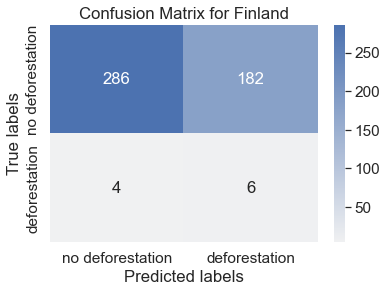

In [5]:
cf_type = "binary"
config = get_config()
country_name = config["confusion_matrix_country"]
df = get_predictions_and_results()
cm = get_confusion_matrix(df, cf_type)

if cf_type == "binary":
    labels = ["no deforestation", "deforestation"]
else:
    labels = ["zero", "low", "moderate", "high"]
        
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6, 4))

g = sns.heatmap(
    cm, annot=True, fmt="g", ax=ax, cmap=sns.color_palette("light:b", as_cmap=True)
)
g.set_yticklabels(labels=g.get_yticklabels(), va="center")

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title(f"Confusion Matrix for {country_name}")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)